In [6]:
from data_tools import *

In [7]:
img_dir = '/home/jovyan/data/planet_flat'

In [ ]:
tif_fns=fn_list(img_dir, "*refl.tif")

In [9]:
tif_fns[0]

'/home/jovyan/data/planet_flat/2412593_1060618_2019-06-02_0f4d_BGRN_Analytic.tif'

In [10]:
# # first, first_ndv=read_raster(tif_fns[0], band=)
# first, first_ndv=read_raster('/home/jovyan/data/planet_flat/795543_1060719_2017-09-28_1021_BGRN_Analytic.tif', band=None)

In [11]:
# first.shape

In [12]:
# histo_me(arr=np.ma.masked_equal(first, 0), 
#          title="First Planet array",
#         )

In [13]:
# tell_me_more(arr=np.ma.masked_equal(first, 0), 
#              name_of_someData='First Planet Array')

In [14]:
# plot_me(first)

### Planet Reflectance Calculations

In [15]:
from xml.dom import minidom

xmldoc = minidom.parse("/home/jovyan/data/planet_flat/795543_1060719_2017-09-28_1021_BGRN_Analytic_metadata.xml")
nodes = xmldoc.getElementsByTagName("ps:bandSpecificMetadata")

# XML parser refers to bands by numbers 1-4
coeffs = {}
for node in nodes:
    bn = node.getElementsByTagName("ps:bandNumber")[0].firstChild.data
    if bn in ['1', '2', '3', '4']:
        i = int(bn)
        value = node.getElementsByTagName("ps:reflectanceCoefficient")[0].firstChild.data
        coeffs[i] = float(value)

print("Conversion coefficients:", coeffs)

Conversion coefficients: {1: 2.76392161975e-05, 2: 2.92131329853e-05, 3: 3.25921192938e-05, 4: 4.87033571614e-05}


In [16]:
band_blue_radiance, _=read_raster('/home/jovyan/data/planet_flat/795543_1060719_2017-09-28_1021_BGRN_Analytic.tif', band=1)
band_green_radiance, _=read_raster('/home/jovyan/data/planet_flat/795543_1060719_2017-09-28_1021_BGRN_Analytic.tif', band=2)
band_red_radiance, _=read_raster('/home/jovyan/data/planet_flat/795543_1060719_2017-09-28_1021_BGRN_Analytic.tif', band=3)
band_nir_radiance, _=read_raster('/home/jovyan/data/planet_flat/795543_1060719_2017-09-28_1021_BGRN_Analytic.tif', band=4)

In [17]:
# Multiply the Digital Number (DN) values in each band by the TOA reflectance coefficients
band_blue_reflectance = band_blue_radiance * coeffs[1]
band_green_reflectance = band_green_radiance * coeffs[2]
band_red_reflectance = band_red_radiance * coeffs[3]
band_nir_reflectance = band_nir_radiance * coeffs[4]

import numpy as np
print("Red band radiance is from {} to {}".format(np.amin(band_red_radiance), np.amax(band_red_radiance)))
print("Red band reflectance is from {} to {}".format(np.amin(band_red_reflectance), np.amax(band_red_reflectance)))

Red band radiance is from 0 to 25348
Red band reflectance is from 0.0 to 0.8261450398592424


In [18]:
print("Blue band radiance is from {} to {}".format(np.amin(band_blue_radiance), np.amax(band_blue_radiance)))
print("Blue band reflectance is from {} to {}".format(np.amin(band_blue_reflectance), np.amax(band_blue_reflectance)))

Blue band radiance is from 0 to 29990
Blue band reflectance is from 0.0 to 0.828900093763025


In [19]:
print("Blue band radiance is from {} to {}".format(np.amin(band_blue_radiance), np.amax(band_blue_radiance)))
print("Blue band reflectance is from {} to {}".format(np.amin(band_blue_reflectance), np.amax(band_blue_reflectance)))

Blue band radiance is from 0 to 29990
Blue band reflectance is from 0.0 to 0.828900093763025


In [20]:
# Properly stacked
# refl_array=np.dstack((band_blue_reflectance, 
#                      band_green_reflectance, 
#                      band_red_reflectance, 
#                      band_nir_reflectance))

In [21]:
refl_array_ogconfig=np.stack((band_blue_reflectance, 
                     band_green_reflectance, 
                     band_red_reflectance, 
                     band_nir_reflectance))

In [22]:
refl_array_ogconfig.shape

(4, 8000, 8000)

In [23]:
# # Save as numpy file for Nancy
# np.save('/home/jovyan/shared/planetpieces/795543_1060719_2017-09-28_1021_BGRN_Analytic_refl.npy', refl_array_ogconfig)

In [27]:
x=np.load('/home/jovyan/shared/planetpieces/795543_1060719_2017-09-28_1021_BGRN_Analytic_refl.npy')
x.shape

(4, 8000, 8000)

In [28]:
blue_manual=x[0,:,:]
green_manual=x[1,:,:]
red_manual=x[2,:,:]
nir_manual=x[3,:,:]

In [29]:
blue_manual.shape
tell_me_more(blue_manual)

[0.0,
 0.0,
 0.074017820976905,
 0.126753445481735,
 0.6676252672506126,
 0.7241751035906975,
 0.10109705927739483]

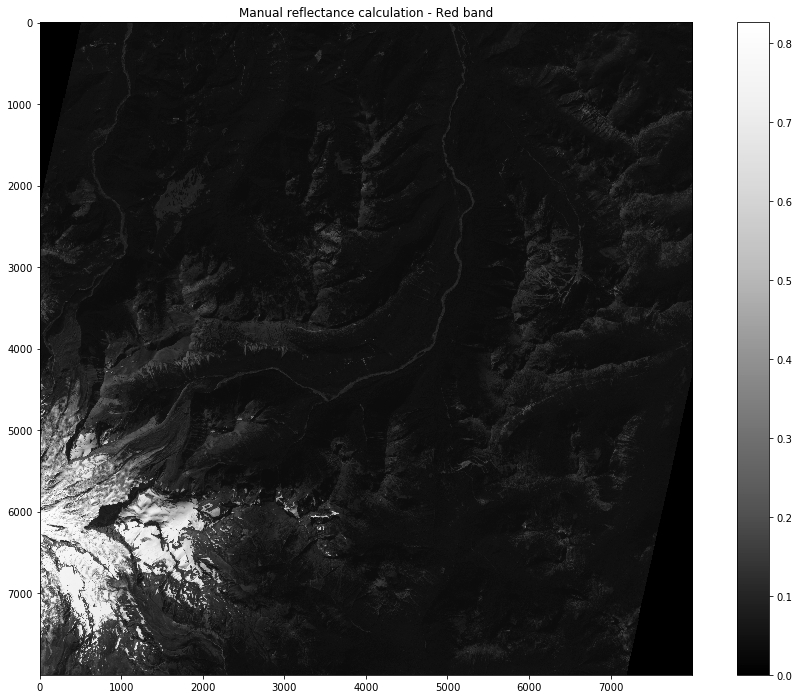

In [30]:
plot_me(red_manual, arr_title="Manual reflectance calculation - Red band")

In [ ]:
# # Code for Nancy
# img=np.load('/home/jovyan/shared/planetpieces/795543_1060719_2017-09-28_1021_BGRN_Analytic_refl.npy')
# img.shape

# blue=img[:,:,0]
# green=img[:,:,0]
# red=img[:,:,0]
# nir=img[:,:,0]

In [31]:
# Visualize refl created from toa_calc.py script
refl_arr, _ = read_raster('/home/jovyan/data/planet_flat/795543_1060719_2017-09-28_1021_BGRN_Analytic_refl.tif', band=None)

In [32]:
refl_arr.shape

(4, 8000, 8000)

In [33]:
blue=refl_arr[0,:,:]/10000
green=refl_arr[1,:,:]/10000
red=refl_arr[2,:,:]/10000
nir=refl_arr[3,:,:]/10000

In [34]:
blue.shape
tell_me_more(blue)

[0.0, 0.0, 0.074, 0.1267, 0.6676, 0.7241, 0.10109545814903222]

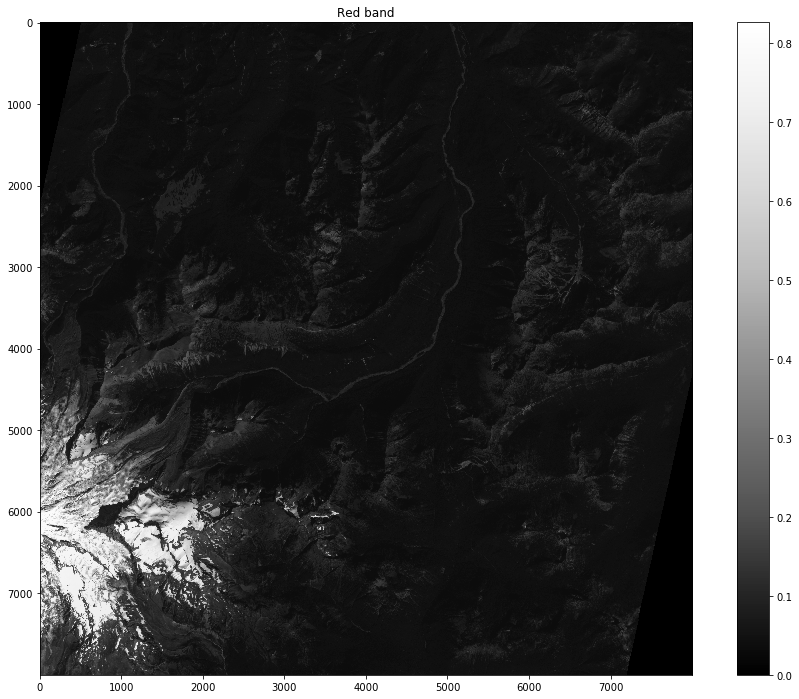

In [35]:
plot_me(red, arr_title='Red band')

In [ ]:
# import numpy as np
# x=np.array([[1, 9, 3],
#        [4, 5, 6]])

# x.shape

In [ ]:
# x[0,2]